In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

%matplotlib inline
import matplotlib.pyplot as plt



In [408]:
df = pd.read_csv('../../../Train.csv', low_memory=False)

Eliminate:
SalesID
MachineID
fiModelSeries
fiModelDescriptor
fiProductClassDesc
ProductGroupDesc
Enclosure_Type


YearMade: remove wrong years



In [17]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [38]:
df['MachineHoursCurrentMeter']

0           68.0
1         4640.0
2         2838.0
3         3486.0
4          722.0
           ...  
401120       NaN
401121       NaN
401122       NaN
401123       NaN
401124       NaN
Name: MachineHoursCurrentMeter, Length: 401125, dtype: float64

In [37]:
len(df['MachineHoursCurrentMeter'].unique())

15153

In [25]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

array([[<AxesSubplot:title={'center':'auctioneerID'}>]], dtype=object)

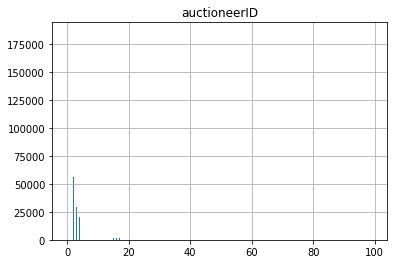

In [48]:
df.hist(column = ['Engine_Horsepower'], bins=200)

<AxesSubplot:>

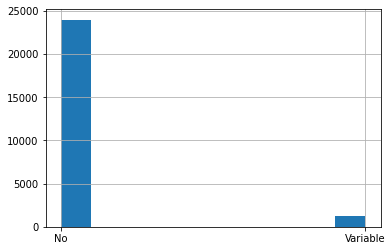

Executing shutdown due to inactivity...


2020-11-06 11:36:38,609 - INFO     - Executing shutdown due to inactivity...


In [61]:
df['Engine_Horsepower'].hist()

In [74]:
df_usage = df[df.UsageBand.notnull()]

In [78]:
df_usage.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [ ]:
def formatting(df):
    '''Format Dataframe for Price Prediction Model
    
    
    '''
    df_usage = df[df.UsageBand.notnull()]
    
    return formatted_df

In [76]:
df_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69639 entries, 0 to 401055
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   69639 non-null  int64  
 1   SalePrice                 69639 non-null  int64  
 2   MachineID                 69639 non-null  int64  
 3   ModelID                   69639 non-null  int64  
 4   datasource                69639 non-null  int64  
 5   auctioneerID              64946 non-null  float64
 6   YearMade                  69639 non-null  int64  
 7   MachineHoursCurrentMeter  69639 non-null  float64
 8   UsageBand                 69639 non-null  object 
 9   saledate                  69639 non-null  object 
 10  fiModelDesc               69639 non-null  object 
 11  fiBaseModel               69639 non-null  object 
 12  fiSecondaryDesc           47886 non-null  object 
 13  fiModelSeries             10964 non-null  object 
 14  fiMod

Cols to make into Categories:
Usage Band: ['Low', 'High', 'Medium']
datasource: [121, 132, 136, 149, 172]

In [81]:
df_usage['datasource'].unique()

array([121, 132, 136, 149, 172])

In [413]:
def drop_column(df, column_name):
    df = df.drop(columns = column_name)
    return df
    

def formatting(df):
    '''Format Dataframe for Price Prediction Model
    
    
    '''
    df_usage = df[df.UsageBand.notnull()]
    drop_list = ['ProductGroupDesc', 'Enclosure_Type', 'Coupler_System', 'SalesID', 'auctioneerID', 'Engine_Horsepower', 'MachineID', 'ModelID',
                'fiModelDesc', 'fiBaseModel','fiSecondaryDesc','fiModelSeries','fiModelDescriptor', 'fiProductClassDesc',
'Thumb_None or Unspecified',
 'Blade_Type_PAT',
 'Enclosure_EROPS',
 'Stick_Standard',
 'Turbocharged_None or Unspecified',
 'Undercarriage_Pad_Width_None or Unspecified',
 'Stick_Extended',
 'Differential_Type_Standard',
 'datasource_172',
 'ProductGroup_TTT',
 'Thumb_Manual',
 'Ride_Control_None or Unspecified',
 'Undercarriage_Pad_Width_32 inch',
 'datasource_121',
 'Hydraulics_Auxiliary',
 'Undercarriage_Pad_Width_28 inch',
 'MachineHoursCurrentMeter',
 'Thumb_Hydraulic',
 'Pushblock_None or Unspecified',
 "Blade_Width_13'",
 'state_North Carolina',
 'Differential_Type_Limited Slip',
 'Undercarriage_Pad_Width_24 inch',
 'Scarifier_None or Unspecified',
 'Travel_Controls_2 Pedal',
 'Blade_Width_None or Unspecified',
 'Tire_Size_10"',
 'Transmission_None or Unspecified',
 'Undercarriage_Pad_Width_30 inch',
 'Turbocharged_Yes',
 "Blade_Width_<12'",
 'state_Tennessee',
 'state_California',
 'state_Maryland',
 'state_New Mexico',
 'Ripper_Multi Shank',
 'Tire_Size_23.1"',
 'state_Hawaii',
 'Undercarriage_Pad_Width_20 inch',
 'Travel_Controls_Finger Tip',
 'state_New York',
 'state_Texas',
 'Hydraulics_Base + 6 Function',
 'state_Massachusetts',
 'Undercarriage_Pad_Width_33 inch',
 'Blade_Type_None or Unspecified',
 'Undercarriage_Pad_Width_22 inch',
 'state_Wyoming',
 'UsageBand_High',
 'state_Utah',
 'state_Arkansas',
 'Tip_Control_None or Unspecified',
 'state_Oklahoma',
 'Tire_Size_23.5"',
 'Stick_Length_9\' 10"',
 'state_Virginia',
 'Undercarriage_Pad_Width_25 inch',
 'Tire_Size_17.5',
 'Undercarriage_Pad_Width_14 inch',
 'Steering_Controls_Four Wheel Standard',
 'Undercarriage_Pad_Width_18 inch',
 'Undercarriage_Pad_Width_31 inch',
 'state_Rhode Island',
 'Stick_Length_9\' 5"',
 'state_New Jersey',
 'Travel_Controls_1 Speed',
 'state_Indiana',
 'Undercarriage_Pad_Width_16 inch',
 'state_Georgia',
 'Stick_Length_13\' 7"',
 'Undercarriage_Pad_Width_15 inch',
 'Stick_Length_8\' 2"',
 'state_Alaska',
 'Tire_Size_7.0"',
 'Hydraulics_None or Unspecified',
 'Undercarriage_Pad_Width_27 inch',
 'state_Idaho',
 'Drive_System_Two Wheel Drive',
 'state_Nebraska',
 'state_Delaware',
 'state_Pennsylvania',
 'Blade_Type_Landfill',
 'Stick_Length_8\' 4"',
 'Travel_Controls_Lever',
 'Travel_Controls_Pedal',
 'Differential_Type_Locking',
 'Transmission_Direct Drive',
 'Enclosure_None or Unspecified',
 'state_Louisiana',
 'UsageBand_Medium',
 'Stick_Length_14\' 1"',
 'datasource_132',
 'Blade_Type_Coal',
 'Undercarriage_Pad_Width_31.5 inch',
 'state_Kentucky',
 'Undercarriage_Pad_Width_26 inch',
 'Hydraulics_Flow_High Flow',
 'Hydraulics_Flow_None or Unspecified',
 'state_Washington DC',
 'state_Michigan',
 'Coupler_None or Unspecified',
 'Transmission_Hydrostatic',
 'Undercarriage_Pad_Width_36 inch',
 'Enclosure_EROPS AC',
 'state_Colorado',
 'Pattern_Changer_No',
 'Tire_Size_13"',
 'Hydraulics_Base + 5 Function',
 'state_Oregon',
 'Blade_Type_Angle',
 'Pad_Type_Grouser',
 'Stick_Length_11\' 10"',
 'Coupler_Manual',
 'Track_Type_Rubber',
 'Pad_Type_None or Unspecified',
 'Tire_Size_20.5',
 'state_Nevada',
 'Grouser_Type_Double',
 'Backhoe_Mounting_Yes',
 'Stick_Length_13\' 10"',
 'Blade_Type_VPAT',
 'Stick_Length_6\' 3"',
 'state_Wisconsin',
 'state_Kansas',
 'Hydraulics_Standard',
 'state_Connecticut',
 'state_New Hampshire',
 'Transmission_AutoShift',
 'Stick_Length_15\' 4"',
 'state_Missouri',
 'Drive_System_All Wheel Drive',
 'state_Vermont',
 'state_Washington',
 'Steering_Controls_Wheel',
 'Hydraulics_Flow_Standard',
 'Transmission_Autoshift',
 'state_Maine',
 'state_Iowa',
 'Differential_Type_No Spin',
 'Hydraulics_Base + 1 Function',
 'Enclosure_NO ROPS',
 'state_Mississippi',
 'Stick_Length_8\' 10"',
 'Stick_Length_9\' 8"',
 'state_Montana',
 'state_Arizona',
 'Stick_Length_12\' 4"',
 'Hydraulics_Base + 4 Function',
 'Drive_System_Four Wheel Drive',
 'Hydraulics_Base + 2 Function',
 'state_Puerto Rico',
 'Tire_Size_15.5',
 'state_Ohio',
 'state_Alabama',
 'Coupler_Hydraulic',
 'state_Illinois',
 'state_Minnesota',
 'state_South Dakota',
 'Stick_Length_8\' 6"',
 'Undercarriage_Pad_Width_34 inch',
 'state_West Virginia',
 'Pad_Type_Street',
 'state_North Dakota',
 'Stick_Length_15\' 9"',
 'Stick_Length_10\' 10"',
 'state_South Carolina',
 'Ripper_Yes',
 'Hydraulics_Base + 3 Function',
 'ProductSize_Small',
 'Tip_Control_Sideshift & Tip',
 'Ripper_Single Shank',
 'Blade_Type_No',
 'Tire_Size_15.5"',
 'Tip_Control_Tip',
 'Stick_Length_12\' 8"',
 'Stick_Length_10\' 2"',
 'Travel_Controls_None or Unspecified',
 'Tire_Size_None or Unspecified',
 "Blade_Width_16'",
 'Blade_Extension_Yes',
 'Stick_Length_11\' 0"',
 'UsageBand_Low',
 'Blade_Type_U',
 'Blade_Type_Straight',
 'datasource_136',
 'Transmission_Powershuttle',
 'Stick_Length_9\' 6"',
 'Pad_Type_Reversible',
 'Scarifier_Yes',
 'Stick_Length_9\' 7"',
 'Steering_Controls_Command Control',
 'Grouser_Tracks_Yes',
 'Tire_Size_17.5"',
 'state_Florida',
 'Blade_Extension_None or Unspecified',
 "Blade_Width_14'",
 'Tire_Size_14"',
 'Hydraulics_3 Valve',
 'Pushblock_Yes',
 'Ride_Control_Yes',
 'Tire_Size_23.5',
 'Transmission_Powershift',
 'Tire_Size_29.5',
 'datasource_149',
 'Grouser_Type_Triple',
 'Hydraulics_4 Valve',
 'Stick_Length_12\' 10"',
 'Stick_Length_None or Unspecified',
 'Tire_Size_20.5"',
 'Stick_Length_10\' 6"',
 'Drive_System_No',
 'Tire_Size_26.5',
 'Steering_Controls_Conventional',
 'Enclosure_EROPS w AC',
 'Forks_Yes',
 'Forks_None or Unspecified',
 'Pattern_Changer_None or Unspecified',
 'Grouser_Tracks_None or Unspecified',
 'ProductGroup_WL',
 'Blade_Type_Semi U',
 'ProductGroup_TEX',
 'Travel_Controls_Differential Steer']
    dummies = ['UsageBand', 'datasource',
       'ProductSize',
       'state', 'ProductGroup', 
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls']
    
    df_usage = pd.get_dummies(df_usage, columns = dummies)
    
    for col in drop_list:
        df_usage = drop_column(df_usage, col)

    df_usage['saledate'] = pd.to_datetime(df_usage['saledate'])
    df_usage['saledate'] = df_usage['saledate'].dt.year

    df_usage['age_at_sale'] = df_usage['saledate']- df_usage['YearMade']
    df_usage = df_usage[df_usage['age_at_sale'] <200]

    y = df_usage['SalePrice']
    X = df_usage.loc[:, df_usage.columns != 'SalePrice']

    return X,y

In [414]:
X,y = formatting(df)

In [290]:
y.describe()

count     64578.000000
mean      35984.488231
std       25793.915709
min        4750.000000
25%       16000.000000
50%       28000.000000
75%       49000.000000
max      142000.000000
Name: SalePrice, dtype: float64

In [293]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet

from sklearn.preprocessing import StandardScaler
from utils import XyScaler

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [428]:
ridge = Ridge(alpha = 8.5)
ridge.fit(X_train, y_train)

Ridge(alpha=8.5)

In [429]:
y_hat = ridge.predict(X_test)

print(mean_squared_error(y_test, y_hat)**.5)

14266.223260817302


In [254]:
def cv(X, y, base_estimator, n_folds=n_folds, random_seed=None):
    """Estimate the in- and out-of-sample error of a model using cross
    validation.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    base_estimator: sklearn model object.
      The estimator to fit.  Must have fit and predict methods.
      
    n_folds: int
      The number of folds in the cross validation.
      
    random_seed: int
      A seed for the random number generator, for repeatability.
    
    Returns
    -------
      
    train_cv_errors, test_cv_errors: tuple of arrays
      The training and testing errors for each fold of cross validation.
    """
    kf = KFold(n_splits=n_folds)

    test_cv_errors, train_cv_errors = np.zeros(n_folds), np.zeros(n_folds)

    X = np.array(X)
    y = np.array(y)

    for idx, (train, test) in enumerate(kf.split(X_train)):
        # Split into train and test
        X_cv_train, y_cv_train = X[train], y[train]
        X_cv_test, y_cv_test = X[test], y[test]

        # Standardize data.
        standardizer = XyScaler()
        standardizer.fit(X_cv_train, y_cv_train)
        X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
        X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)

        # Fit estimator
        model = base_estimator
        model.fit(X_cv_train_std, y_cv_train_std)

        # Measure performance
        y_hat_train = model.predict(X_cv_train_std)
        y_hat_test = model.predict(X_cv_test_std)

        # Calclate the error metrics
        train_cv_errors[idx] = mean_squared_error(y_cv_train_std, y_hat_train)
        test_cv_errors[idx] = mean_squared_error(y_cv_test_std, y_hat_test)

    return train_cv_errors, test_cv_errors

In [255]:
cv(X, y, Ridge(alpha = ridge_optimal_alpha), n_folds=10, random_seed=None)

(array([0.25546262, 0.25541961, 0.25263772, 0.25434111, 0.24693463,
        0.25152918, 0.26438403, 0.24823501, 0.2560964 , 0.2526556 ]),
 array([0.22819465, 0.23844828, 0.27121011, 0.26717647, 0.29565655,
        0.25512974, 0.32731649, 0.30726921, 0.30372605, 0.24874709]))

In [389]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    """Train a regularized regression model using cross validation at various
    values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression
      object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of
      alpha and each cross validation fold.  Each row represents a CV fold, and
      each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    X = np.array(X)
    y = np.array(y)
    for alpha in alphas:
        kf = KFold(n_splits=n_folds)
        
        for idx, (train, test) in enumerate(kf.split(X)):
    
            X_cv_train, y_cv_train = X[train], y[train]
            X_cv_test, y_cv_test = X[test], y[test]
      
            standardizer = XyScaler()
            standardizer.fit(X_cv_train, y_cv_train)
            X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
            X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)
            
        
            m = Ridge(alpha = alpha)
            m.fit(X_cv_train_std, y_cv_train_std)
        
            y_hat_train = m.predict(X_cv_train_std)
            y_hat_test = m.predict(X_cv_test_std)
        
            cv_errors_train[alpha][idx] = mean_squared_error(y_cv_train_std, y_hat_train)
            cv_errors_test[alpha][idx] = mean_squared_error(y_cv_test_std, y_hat_test)

    return cv_errors_train, cv_errors_test

In [419]:
ridge_alphas = np.logspace(-2, 8, num=100)

ridge_cv_errors_train, ridge_cv_errors_test = train_at_various_alphas(X_train, y_train, Ridge, ridge_alphas) 

In [422]:
avg_errors_train = ridge_cv_errors_train.mean()
avg_errors_test = ridge_cv_errors_test.mean()


In [423]:
def get_optimal_alpha(avg_errors_test):
    alphas = avg_errors_test.index
    optimal_idx = np.argmin(avg_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha

ridge_optimal_alpha = get_optimal_alpha(avg_errors_test)

In [424]:
ridge_optimal_alpha

8.497534359086439

In [430]:
features = X.columns
df_coefs = pd.DataFrame(np.empty(shape=(len(ridge_alphas), X.shape[1])), columns = features, index = ridge_alphas)

In [431]:
standardizer = XyScaler()
X_train = np.array(X_train)
y_train = np.array(y_train)
standardizer.fit(X_train, y_train)
X_cv_train_std, y_cv_train_std = standardizer.transform(X_train, y_train)

for idx, alpha in enumerate(ridge_alphas):
    model = Ridge(alpha = alpha)        
    model.fit(X_cv_train_std, y_cv_train_std)
    df_coefs.iloc[idx] = model.coef_ #this gives a list of coefficients for all features

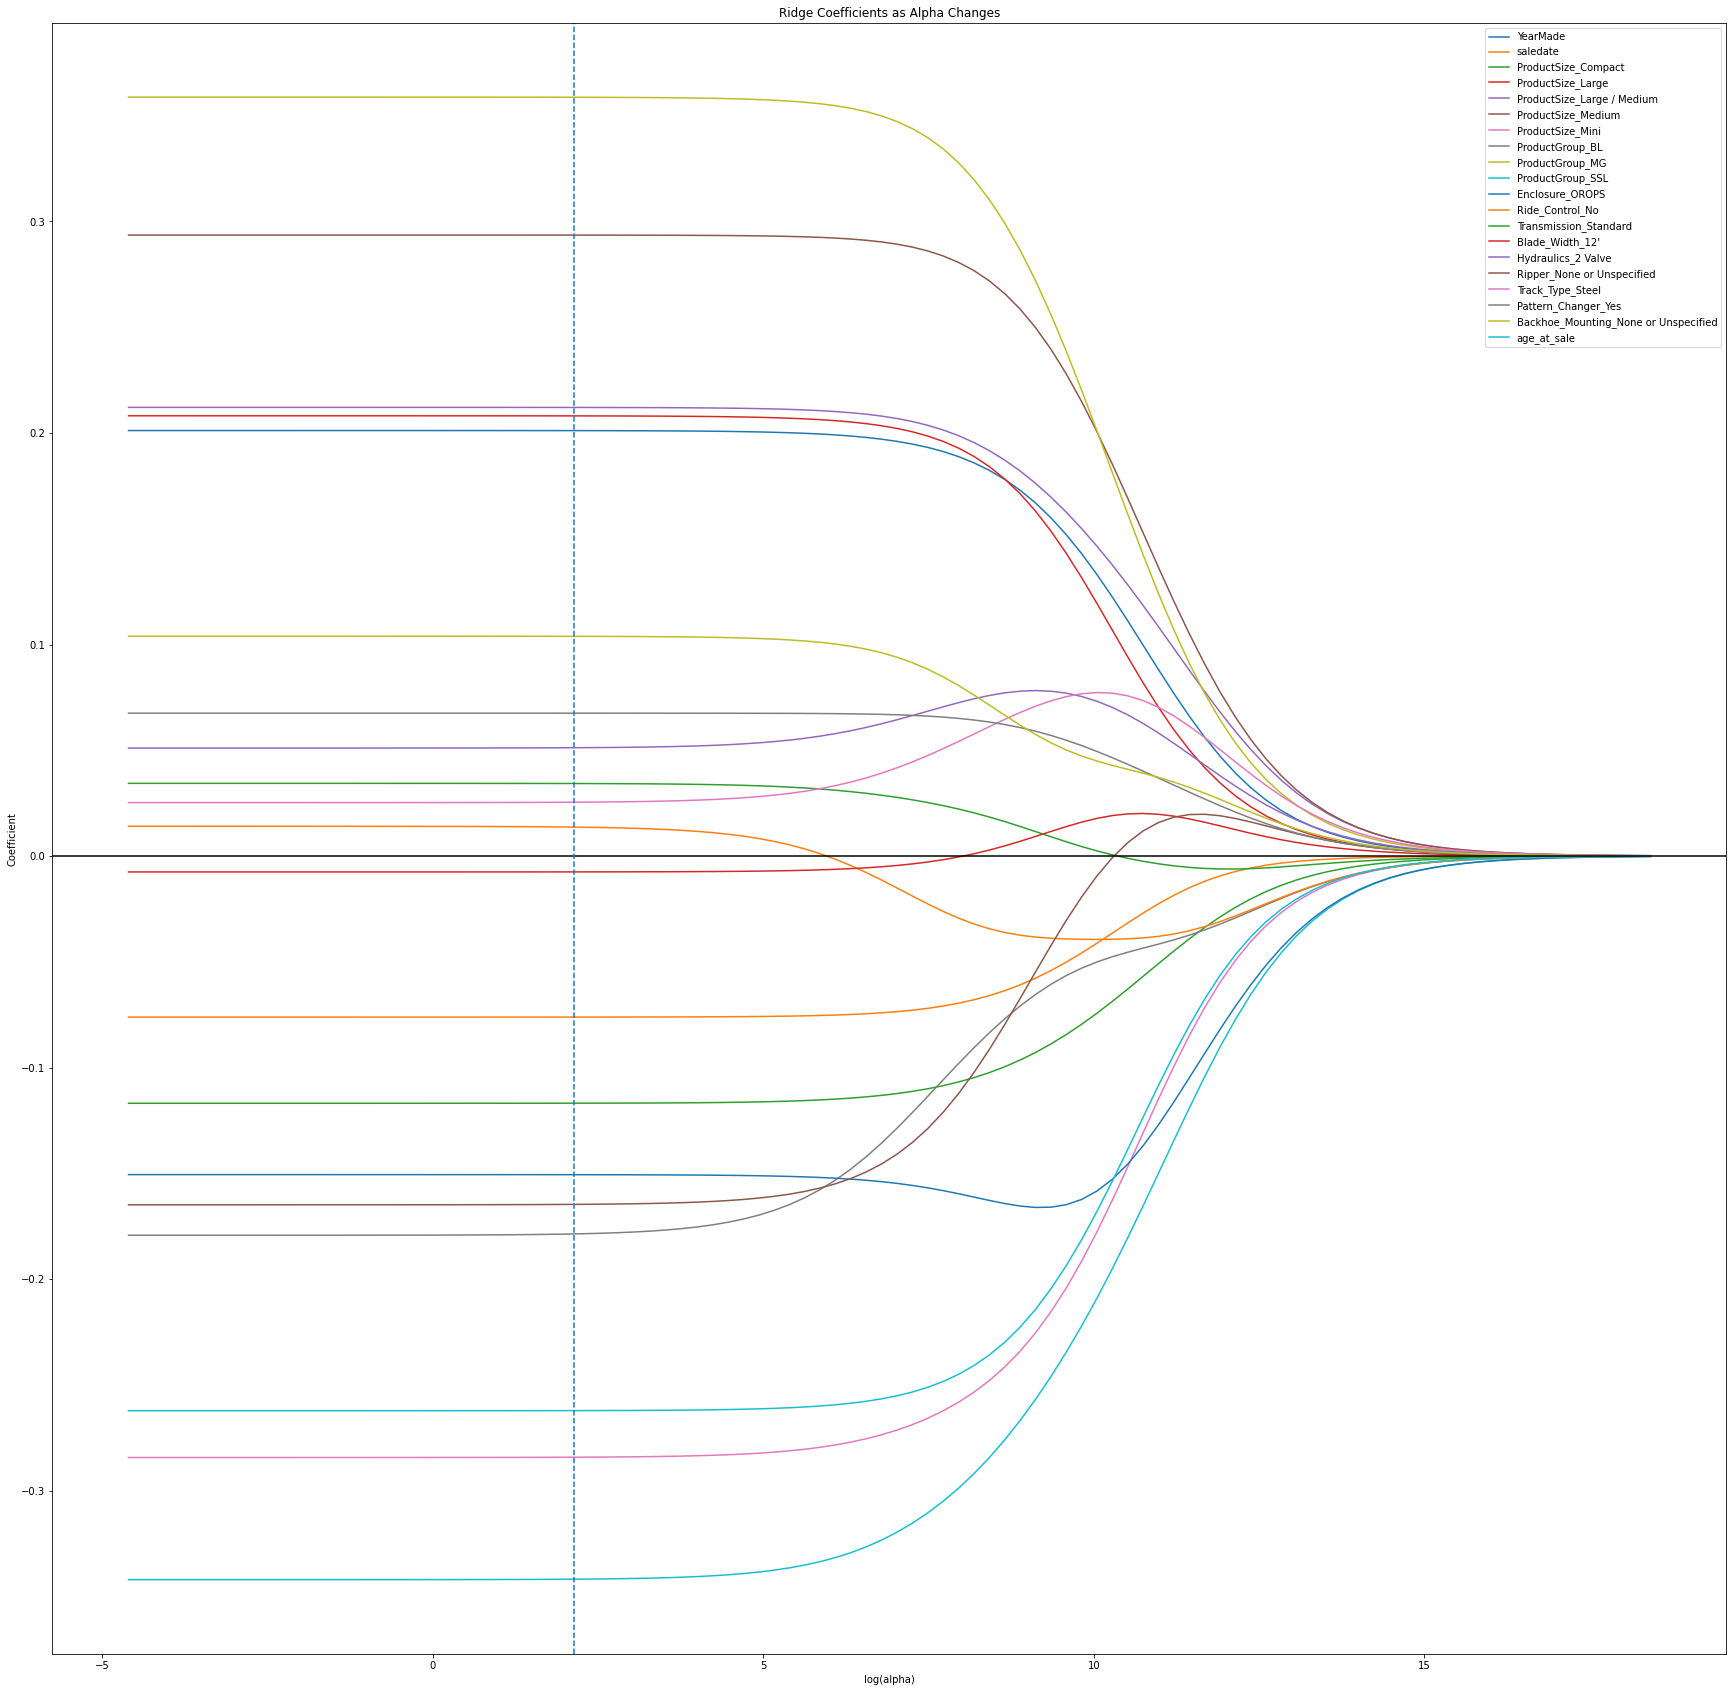

In [432]:
fig, ax = plt.subplots(figsize = (30,30))
for col in df_coefs.columns:
    ax.plot(np.log(df_coefs.index), df_coefs[col], label = str(col))
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Coefficient')
ax.axhline(0, color = 'k')
ax.set_title('Ridge Coefficients as Alpha Changes')
ax.axvline(np.log(ridge_optimal_alpha), linestyle = 'dashed')
ax.legend();
plt.savefig('../presentation/ridge_lambda.png', dpi=150)

In [309]:
en_alphas = np.logspace(-5, 1, num=100)

en_cv_errors_train, en_cv_errors_test = train_at_various_alphas(X_train, y_train, ElasticNet, en_alphas) 

/home/george/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1011.0823555134948, tolerance: 4.649500000000015

/home/george/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1304.8732912958667, tolerance: 4.649499999999997

/home/george/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164.276090937221, tolerance: 4.649600000000008

/home/george/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Dual

KeyboardInterrupt: 

In [301]:
avg_errors_train = en_cv_errors_train.mean()
avg_errors_test = en_cv_errors_test.mean()
en_optimal_alpha = get_optimal_alpha(avg_errors_test)

In [302]:
features = X.columns
df_coefs = pd.DataFrame(np.empty(shape=(len(ridge_alphas), X.shape[1])), columns = features, index = en_alphas)

In [331]:
en_alphas = np.logspace(-5, 1, num=50)

standardizer = XyScaler()
X_train = np.array(X_train)
y_train = np.array(y_train)
standardizer.fit(X_train, y_train)
X_cv_train_std, y_cv_train_std = standardizer.transform(X_train, y_train)

for idx, alpha in enumerate(en_alphas):
    model = ElasticNet(alpha = alpha, l1_ratio =.8)        
    model.fit(X_cv_train_std, y_cv_train_std)
    df_coefs.iloc[idx] = model.coef_

/home/george/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5451.86343008348, tolerance: 5.1662000000000035

/home/george/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5251.703639760172, tolerance: 5.1662000000000035

/home/george/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5017.05450257937, tolerance: 5.1662000000000035

/home/george/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duali

KeyboardInterrupt: 

/home/george/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



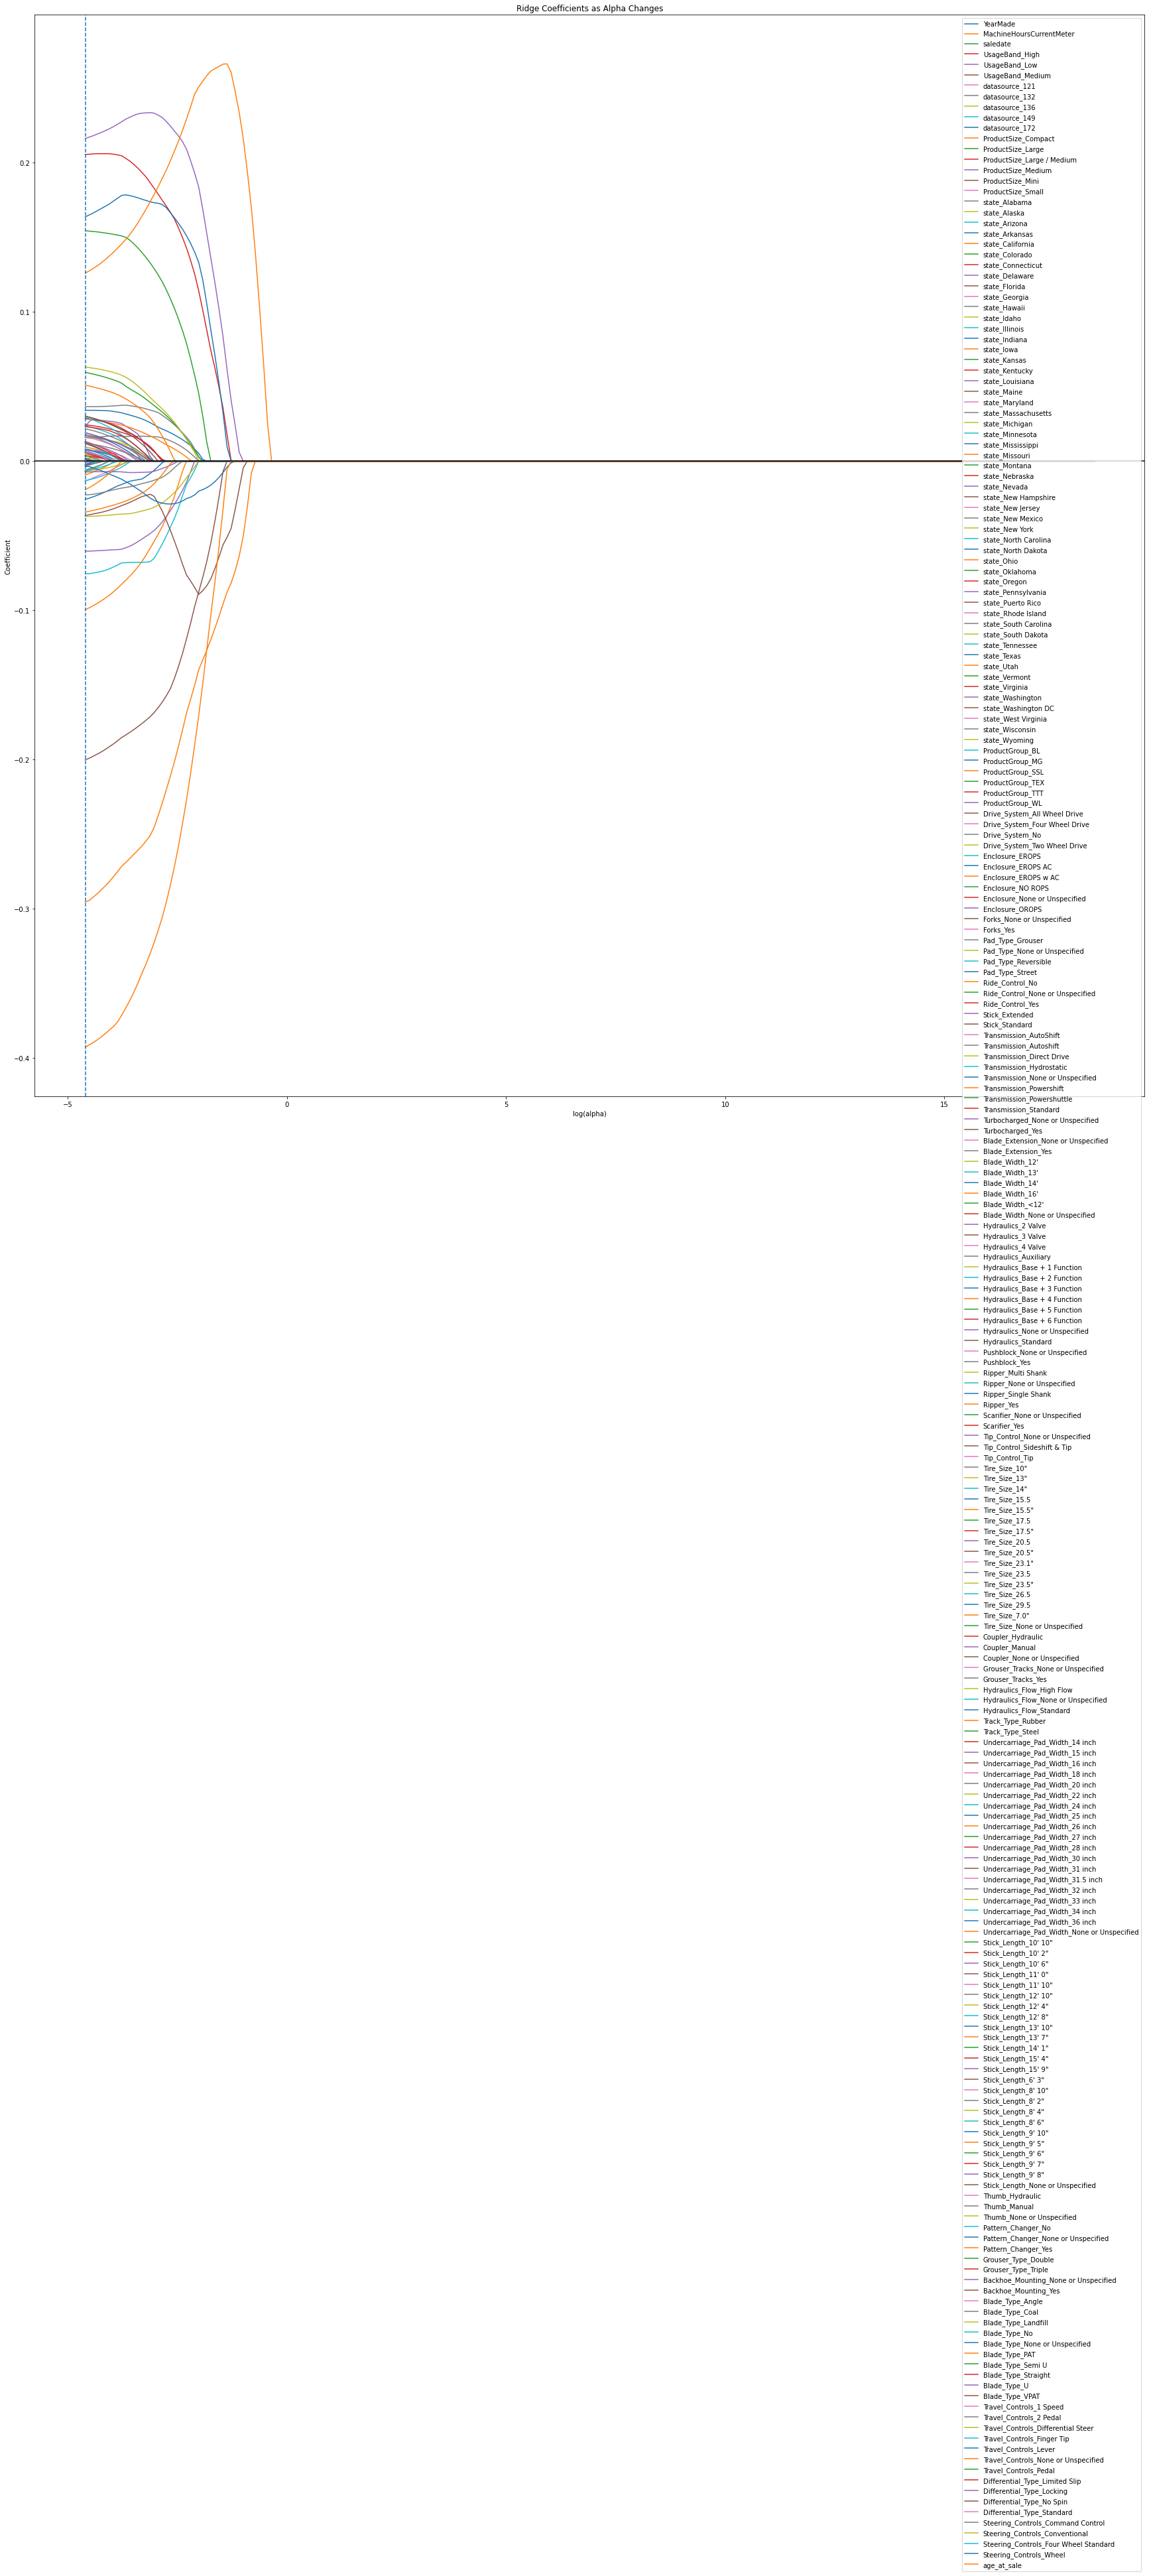

In [305]:
fig, ax = plt.subplots(figsize = (30,30))
for col in df_coefs.columns:
    ax.plot(np.log(df_coefs.index), df_coefs[col], label = str(col))
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Coefficient')
ax.axhline(0, color = 'k')
ax.set_title('Ridge Coefficients as Alpha Changes')
ax.axvline(np.log(en_optimal_alpha), linestyle = 'dashed')
ax.legend();
plt.tight_layout()
#plt.savefig('../presentation/elastic_net_lambda.png', dpi=150)

In [314]:
df_sorted = df_coefs.sort_index()

In [341]:
df_s = df_coefs.loc[en_optimal_alpha].sort_values()

In [401]:
bad_features = df_s[(df_s < .07) & (df_s > -.07)]

In [402]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
bad_features_list = list(bad_features.index)

In [405]:
len(bad_features_list)

223